In [248]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

import os 
import sys 

# TODO: may have to add '..' if move from root folder
home = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
pths = [os.path.join(home, 'astrobot')]

for pth in pths: 
    if pth not in sys.path: sys.path.insert(0, pth)

from astrobot.util import *

import matplotlib.pyplot as plt 
import seaborn as sn 
import numpy as np 
import pandas as pd 

from scipy import stats
import functools as ft 

from __future__ import print_function

import numpy as np 
pp = print 

def ppf(x, *args, **kwargs):
    def _pd(x):
        frame = sys._getframe(1)
        return repr(eval(x, frame.f_globals, frame.f_locals))
    pp(f"{x}={_pd(x)}", *args, **kwargs)

reduce = ft.reduce
sn.set(style="ticks", context="talk")
plt.style.use("dark_background")
    
# Tab after '.' to get all methods 
# Tab Shift after () to get documentation.
# To read excel data:
# pd.read_excel('afn_infil_data.xlsx')
# pd.read_clipboard()

# For experiments
# path to astrobot roo
ROOT_DIR

# path to this package from experiments folder
PACKAGE_FPATH_FOR_EXPERIMENTS

# path to epw from experiments folder
EPW_FPATH_FOR_EXPERIMENTS

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'c:\\Users\\admin\\master\\resources\\epw\\philadelphia\\philadelphia.epw'

In [249]:
def plot_seq(seq_p):
    seq_p *= 100;
    ax = plt.subplots(figsize=(10,10))[1]
    ax = sn.heatmap(seq_p, ax=ax, square=True, annot=True,
                    linecolor='gray', linewidth=0.5);
    ax.plot(np.arange(11), np.ones(11) * 5, c='blue', lw=6);
    return ax 

def get_seq_i(x,y):
    labels = ['ns', 'ew', 'd1', 'd2']
    ns = lambda x,y: (list(range(x-4, x+5)), [y]*9)
    ew = lambda x,y: ([x]*9, list(range(y-4, y+5)))
    d1 = lambda x,y: (list(range(x-4, x+5)), list(range(y-4, y+5)))
    d2 = lambda x,y: (d1(x, y)[0], d1(x, y)[1][::-1]) 
    si = np.array([f(x,y) for f in [ns, ew, d1, d2]]).astype(int)
    return labels, np.dstack((si[:, :, :4], si[:, :, 5:]))

def any_corner(xx, yy, corners):
    return any(True if is_corner(x_, y_, corners) else False 
               for x_, y_ in zip(xx, yy))    
    
def is_corner(x, y, cor):
    return True if any(True for cc in cor if (x, y) == cc) else False 
    
p = 0.5; grid_num = 100 # 10 * 10 
seq = np.zeros((10 + 8, 10 + 8))
inner = np.s_[4:14, 4:14]

Text(0.5, 1.0, 'Probability of sequence occuring at least once,\ngiven 50% probability of team drawing card at location.\n')

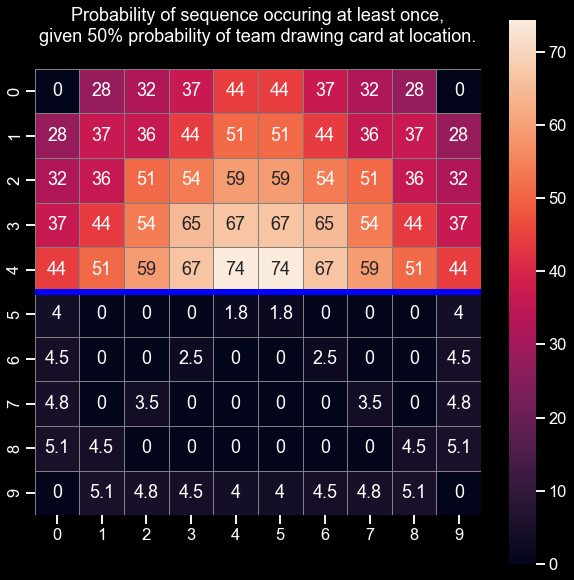

In [252]:

# https://math.stackexchange.com/questions/1885662/something-with-a-probability-of-1-occurring-100-times
seq[inner] = p
seq_p, seq_b = seq.copy() * 0.0, seq.copy() * 0.0
seq_b[inner] = 1
coords = np.where(seq_b == 1)
debug_coord = False #(4, 0)
for x, y in zip(*coords):        
    corners = [(4, 4), (4, 13), (13, 4), (13, 13)]
    if is_corner(x, y, corners):
        continue 
    corners = [(4, 4), (4, 13)]  # Only account for top corners
    (lbs, seq_mtx), total_p = get_seq_i(x, y), []
    debug = (x, y) == debug_coord
    if debug: 
        debug_coord = (debug_coord[0] + 4, debug_coord[1] + 4) 
    num_valid_ = 0
    for lb, si in zip(lbs, seq_mtx):
        xx, yy = si  # axis indices
        any_corner_ = any_corner(xx, yy, corners)
        valid = int(np.sum(seq_b[xx, yy]))
        num_valid = (valid-4) + 1 if valid > 3 else 0   
        if any_corner_:
            total_p_ = [(p ** 4) for _ in  np.arange(num_valid-1)] 
            total_p_ += [(p ** 3)]
            total_p.extend(total_p_)
        else: 
            total_p_ = [(p ** 4) for _ in range(num_valid)]
            total_p.extend(total_p_)
        num_valid_ += num_valid
        if debug: print(lb, seq[xx, yy], valid, num_valid)#, total_p)
    # prob of E not happening in N events: 1 - (1 - p(E))^N
    # seq_p[x, y] = num_valid_; 
    seq_p[x, y] = 1.0 - np.prod(1.0 - np.array(total_p))    
    if debug: print(x, y, seq_p[x, y])
    
if debug: seq_p[debug_coord] = 0 #print(seq_p[[8,9], 4]); #seq_p /= np.sum(seq_p); 

#seq_p[debug_coord] = 0; print(seq_p[debug_coord])
seq_p = seq_p[inner]
seq_p_ = seq_p[:5, :][::-1, :]; seq_p[5:, :] = seq_p_ - seq_p[5:, :]   
ax = plot_seq(seq_p);     # ax.set_title(
ax.set_title("Probability of sequence occuring at least once,\n"
             "given 50% probability of team drawing card at location.\n")